In [2]:
import os
os.chdir('/Users/devaguru/Kidney Stone CNN/kidney-stone-cnn')
print("Working directory:", os.getcwd())

Working directory: /Users/devaguru/Kidney Stone CNN/kidney-stone-cnn


# Imports

In [3]:
import cv2, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path('data/processed')
df = pd.read_csv('data/labels/splits.csv')
print("Loaded", len(df), "rows")

Loaded 12446 rows


# Class distribution chart

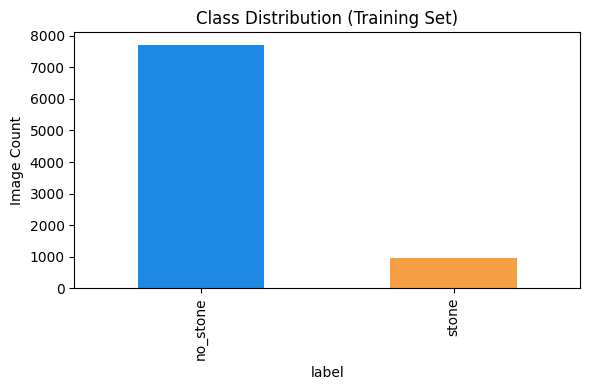

In [4]:
train_df = df[df.split == 'train']
counts = train_df['label'].value_counts()
counts.plot(kind='bar', color=['#1E88E5','#F59E42'], figsize=(6,4))
plt.title('Class Distribution (Training Set)')
plt.ylabel('Image Count')
plt.tight_layout()
plt.savefig('data/labels/label_verification/class_distribution.png', dpi=120)
plt.show()

# Sample image grid

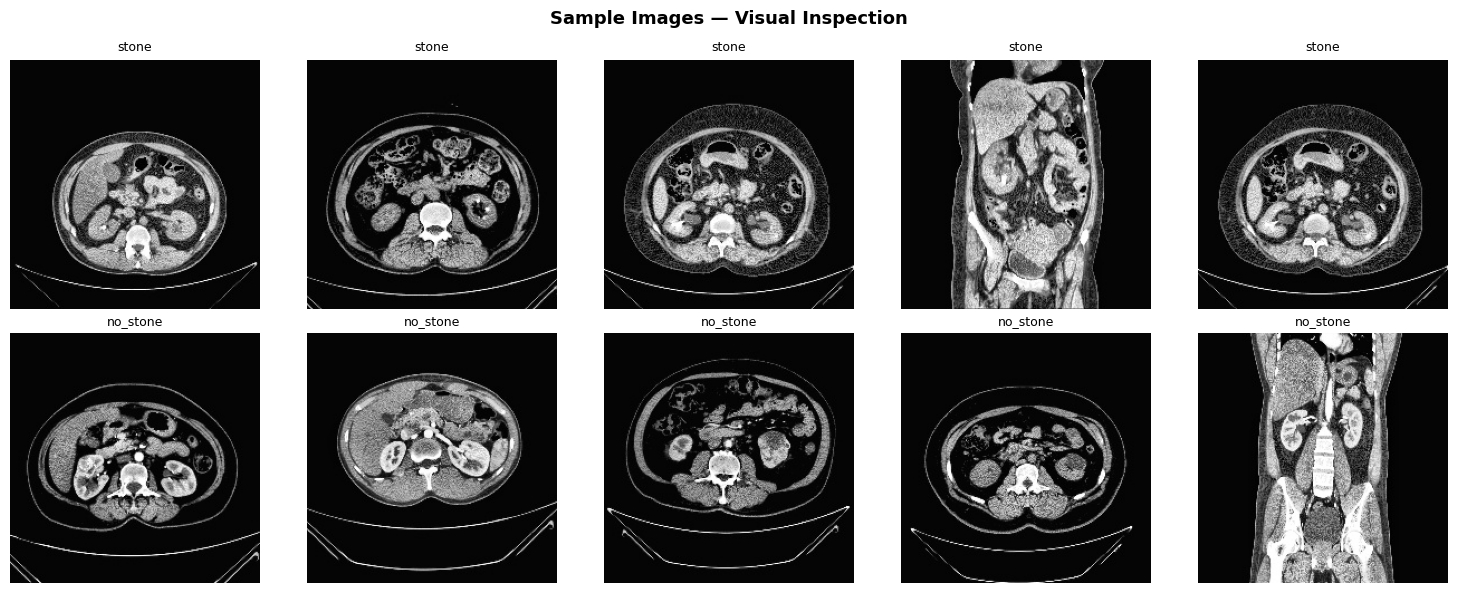

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, label in enumerate(['stone', 'no_stone']):
    folder = DATA_DIR / 'train' / label
    images = list(folder.glob('*.jpg'))[:5]
    for j, img_path in enumerate(images):
        img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
        axes[i][j].imshow(img)
        axes[i][j].set_title(label, fontsize=9)
        axes[i][j].axis('off')
plt.suptitle('Sample Images — Visual Inspection', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('data/labels/label_verification/sample_images.png', dpi=120)
plt.show()

# Intensity histogram

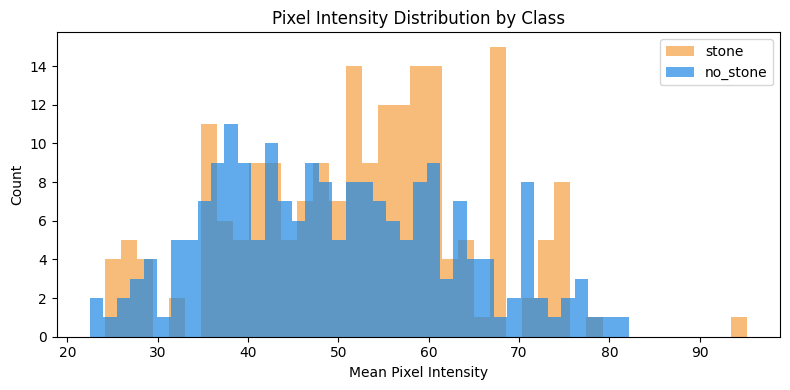

In [6]:
stone_means, no_stone_means = [], []
for label, lst in [('stone', stone_means), ('no_stone', no_stone_means)]:
    for f in list((DATA_DIR/'train'/label).glob('*.jpg'))[:200]:
        img = cv2.imread(str(f), cv2.IMREAD_GRAYSCALE)
        if img is not None: lst.append(img.mean())

plt.figure(figsize=(8,4))
plt.hist(stone_means, bins=40, alpha=0.7, label='stone', color='#F59E42')
plt.hist(no_stone_means, bins=40, alpha=0.7, label='no_stone', color='#1E88E5')
plt.xlabel('Mean Pixel Intensity'); plt.ylabel('Count')
plt.title('Pixel Intensity Distribution by Class')
plt.legend(); plt.tight_layout()
plt.savefig('data/labels/label_verification/intensity_dist.png', dpi=120)
plt.show()